# 실습 3
> 파이썬으로 만드는 인공지능 - 오일석 이진선 저

## 퍼셉트론 프로그래밍

In [1]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, 1]

# fit 함수로 Perceptron 학습
p = Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))
print("정확률 측정", p.score(X, y) * 100, "%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정 100.0 %


### 필기 숫자 데이터 인식

In [2]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

# fit 함수로 Perceptron 학습
p = Perceptron(max_iter=1000, eta0 = 0.001, verbose= 0)
p.fit(x_train, y_train)

res = p.predict(x_test)

# 혼동 행렬
conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)

print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다")

[[71.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 69.  0.  0.  2.  2.  0.  0.  7.  2.]
 [ 0.  1. 68.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 65.  0.  0.  0.  0.  1.  2.]
 [ 0.  0.  0.  0. 72.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  2.  1. 72.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0. 74.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. 73.  1.  4.]
 [ 0.  0.  0.  2.  0.  0.  0.  0. 50.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  1.  1. 68.]]
테스트 집합에 대한 정확률은  94.85396383866481 %입니다


## 다층퍼셉트론 프로그래밍

### 필기 숫자 데이터 인식

In [3]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련, 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

# MLP 분류기 모델 학습
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32,
                   max_iter=3000, verbose=True)
mlp.fit(x_train, y_train)

res = mlp.predict(x_test)

# 혼동 행렬
conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)

print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다")

Iteration 1, loss = 3.38253505
Iteration 2, loss = 0.69843246
Iteration 3, loss = 0.34446444
Iteration 4, loss = 0.25154684
Iteration 5, loss = 0.18368978
Iteration 6, loss = 0.14858980
Iteration 7, loss = 0.12262284
Iteration 8, loss = 0.10022996
Iteration 9, loss = 0.08662026
Iteration 10, loss = 0.07838151
Iteration 11, loss = 0.06451663
Iteration 12, loss = 0.05273856
Iteration 13, loss = 0.04723213
Iteration 14, loss = 0.03886074
Iteration 15, loss = 0.03338405
Iteration 16, loss = 0.03059381
Iteration 17, loss = 0.02668998
Iteration 18, loss = 0.02277131
Iteration 19, loss = 0.02575858
Iteration 20, loss = 0.03056377
Iteration 21, loss = 0.01771522
Iteration 22, loss = 0.02043701
Iteration 23, loss = 0.01518249
Iteration 24, loss = 0.01456050
Iteration 25, loss = 0.01510483
Iteration 26, loss = 0.01131158
Iteration 27, loss = 0.01098018
Iteration 28, loss = 0.00936810
Iteration 29, loss = 0.00889427
Iteration 30, loss = 0.00837143
Iteration 31, loss = 0.00795787
Iteration 32, los

### MNIST 데이터셋 인식

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=512,
                   max_iter=300, solver='adam', verbose=True)
mlp.fit(x_train, y_train)

# 테스트 집합으로 예측
res = mlp.predict(x_test)

# 혼동 행렬
conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)

print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다")

Iteration 1, loss = 0.64983760
Iteration 2, loss = 0.26434390
Iteration 3, loss = 0.20895722
Iteration 4, loss = 0.17698363
Iteration 5, loss = 0.15283713
Iteration 6, loss = 0.13378950
Iteration 7, loss = 0.11958940
Iteration 8, loss = 0.10754322
Iteration 9, loss = 0.09770534
Iteration 10, loss = 0.08847426
Iteration 11, loss = 0.08093833
Iteration 12, loss = 0.07430203
Iteration 13, loss = 0.06915634
Iteration 14, loss = 0.06348332
Iteration 15, loss = 0.05900447
Iteration 16, loss = 0.05483872
Iteration 17, loss = 0.05041390
Iteration 18, loss = 0.04711113
Iteration 19, loss = 0.04434466
Iteration 20, loss = 0.04052642
Iteration 21, loss = 0.03813379
Iteration 22, loss = 0.03556545
Iteration 23, loss = 0.03290068
Iteration 24, loss = 0.03069086
Iteration 25, loss = 0.02847791
Iteration 26, loss = 0.02658294
Iteration 27, loss = 0.02469222
Iteration 28, loss = 0.02331667
Iteration 29, loss = 0.02157946
Iteration 30, loss = 0.01978543
Iteration 31, loss = 0.01834668
Iteration 32, los

## 하이퍼 파라미터 살피기

🎇 참고
* MLPClassifier의 파라미터
    * hidden_layer_size : 노드가 100개인 은닉층 하나 (100,80)으로하면 노드 100개인 은닉층 80개
    * learning_rate_init : 학습률 0.001
    * batch_size : 미니 배치 크기 32 63 ...
    * max_iter : 최대 반복횟수 300
    * solver : 최적화 알고리즘 sgd 사용
    * verbose : 학습 도중 발생하는 정보를 출력하는 방식

### 단일 hyper parameter 최적화: validation_curve 함수

하이퍼 매개변수 최적화에 걸린 시간은  164.08270740509033 초 입니다.


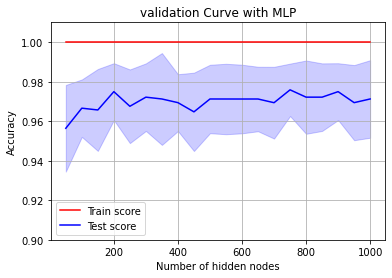


최적의 은닉층의 노드 개수는  750 개 입니다
[[83.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 70.  0.  0.  0.  0.  1.  0.  4.  0.]
 [ 0.  0. 72.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 71.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 60.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 90.  0.  0.  1.  2.]
 [ 0.  0.  0.  0.  0.  1. 61.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 69.  2.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0. 64.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0. 63.]]
테스트 집합에 대한 정확률은  97.77468706536857 %입니다


In [5]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋을 읽고 훈련, 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 선능 평가 (소요 시간 측정 포함)
start=time.time()
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=3000, solver='sgd')
prange = range(50, 1001, 50)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name='hidden_layer_sizes',
                                          param_range=prange, cv=10, scoring='accuracy', n_jobs=4)
end = time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은 ", end - start,"초 입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(prange, train_mean, label='Train score', color='r')
plt.plot(prange, test_mean, label='Test score', color='b')
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha=0.2, color='b')
plt.legend(loc='best')
plt.title("validation Curve with MLP")
plt.xlabel('Number of hidden nodes'); plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는 ", best_number_nodes, "개 입니다")

# 최적의 은닉 노드 개수로 모델링
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,
                        batch_size=32, max_iter=300, solver='sgd')
mlp_test.fit(x_train, y_train)

res = mlp_test.predict(x_test)

# 혼동 행렬
conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)

print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다")